<a href="https://www.kaggle.com/code/mrsimple07/operating-system-market-analysis?scriptVersionId=195550243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/operating-system-market-2009-2023/os_worldwide_update_may_2024.csv
/kaggle/input/operating-system-market-2009-2023/os_worldwide.csv
/kaggle/input/operating-system-market-2009-2023/os_worldwide_update_feb_2024.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/operating-system-market-2009-2023/os_worldwide.csv')
df.head()

,Date,Windows,Android,iOS,OS X,Unknown,Linux,Series 40,SymbianOS,Samsung,...,Nokia Unknown,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,Other
0,2009-01,94.80,0.00,0.24,3.66,0.27,0.64,0.0,0.26,0.0,...,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
1,2009-02,94.74,0.01,0.25,3.73,0.22,0.61,0.0,0.26,0.0,...,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.02
2,2009-03,94.48,0.02,0.32,3.84,0.25,0.64,0.0,0.28,0.0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
3,2009-04,94.32,0.02,0.36,3.89,0.26,0.66,0.0,0.30,0.0,...,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
4,2009-05,94.44,0.02,0.32,3.72,0.32,0.64,0.0,0.34,0.0,...,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01


In [3]:
df.isnull().sum()

Date             0
Windows          0
Android          0
iOS              0
OS X             0
Unknown          0
Linux            0
Series 40        0
SymbianOS        0
Samsung          0
BlackBerry OS    0
Chrome OS        0
Nokia Unknown    0
Playstation      0
Sony Ericsson    0
KaiOS            0
Xbox             0
bada             0
Tizen            0
LG               0
Nintendo         0
Other            0
dtype: int64

Just checking some visualizations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


fig = px.line(df, x = 'Date', y = ['Windows', 'Android'])
fig.update_layout(
    legend_title='Variable',
    template='plotly_dark'
)
fig.show()

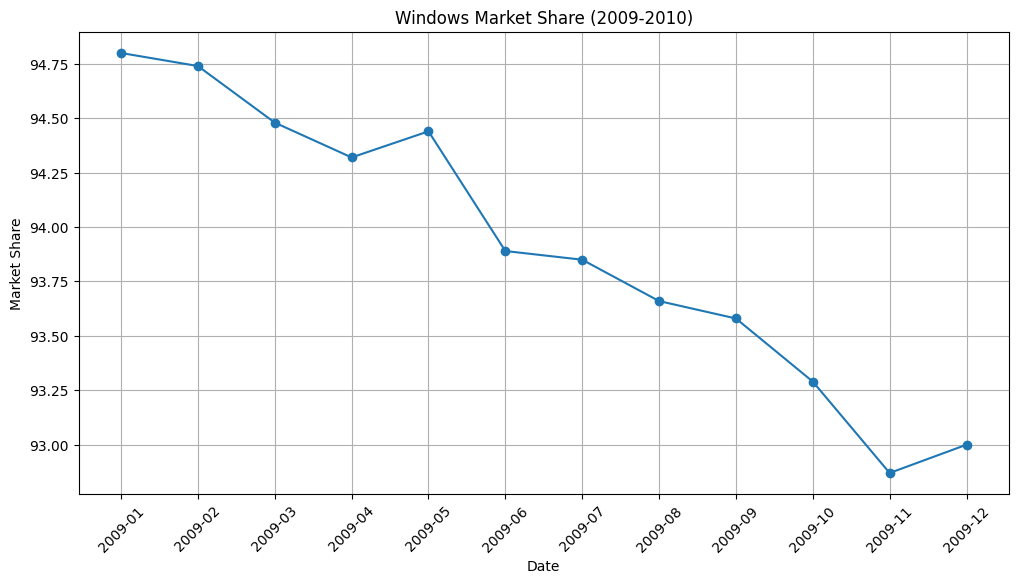

In [5]:
df_windows = df[(df['Date'] >= '2009') & (df['Date'] <= '2010')]

plt.figure(figsize=(12, 6))
plt.plot(df_windows['Date'], df_windows['Windows'], marker='o')
plt.title('Windows Market Share (2009-2010)')
plt.xlabel('Date')
plt.ylabel('Market Share')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Let's check 2023 market share

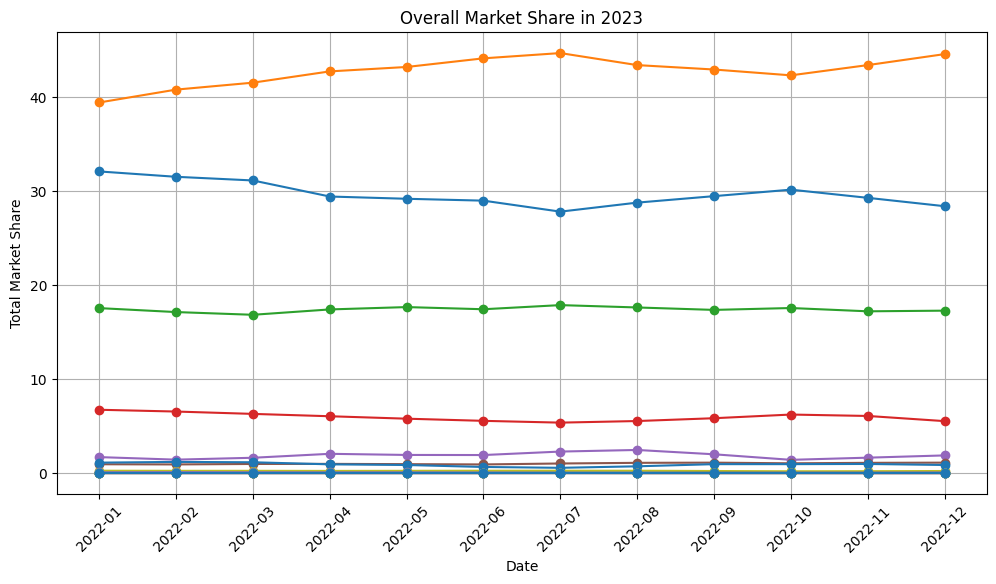

In [6]:
import matplotlib.pyplot as plt

df_2023 = df[(df['Date'] < '2023') & (df['Date'] >='2022')]

plt.figure(figsize=(12, 6))
plt.plot(df_2023['Date'], df_2023.drop(['Date'], axis =1), marker='o')
plt.title('Overall Market Share in 2023')
plt.xlabel('Date')
plt.ylabel('Total Market Share')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
df.head()

,Date,Windows,Android,iOS,OS X,Unknown,Linux,Series 40,SymbianOS,Samsung,...,Nokia Unknown,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,Other
0,2009-01,94.80,0.00,0.24,3.66,0.27,0.64,0.0,0.26,0.0,...,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
1,2009-02,94.74,0.01,0.25,3.73,0.22,0.61,0.0,0.26,0.0,...,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.02
2,2009-03,94.48,0.02,0.32,3.84,0.25,0.64,0.0,0.28,0.0,...,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
3,2009-04,94.32,0.02,0.36,3.89,0.26,0.66,0.0,0.30,0.0,...,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01
4,2009-05,94.44,0.02,0.32,3.72,0.32,0.64,0.0,0.34,0.0,...,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.01


In [8]:
df_2022 = df[(df['Date'] < '2023') & (df['Date'] >='2022')]
df_2022.head()

,Date,Windows,Android,iOS,OS X,Unknown,Linux,Series 40,SymbianOS,Samsung,...,Nokia Unknown,Playstation,Sony Ericsson,KaiOS,Xbox,bada,Tizen,LG,Nintendo,Other
156,2022-01,32.11,39.45,17.56,6.74,1.70,0.94,0.01,0.0,0.25,...,0.01,0.04,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0
157,2022-02,31.54,40.82,17.14,6.55,1.43,0.92,0.01,0.0,0.24,...,0.01,0.03,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.0
158,2022-03,31.15,41.56,16.85,6.30,1.63,0.97,0.01,0.0,0.24,...,0.01,0.03,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0
159,2022-04,29.44,42.76,17.42,6.05,2.05,0.98,0.01,0.0,0.23,...,0.01,0.03,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0
160,2022-05,29.20,43.23,17.67,5.79,1.93,0.95,0.01,0.0,0.24,...,0.01,0.03,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0


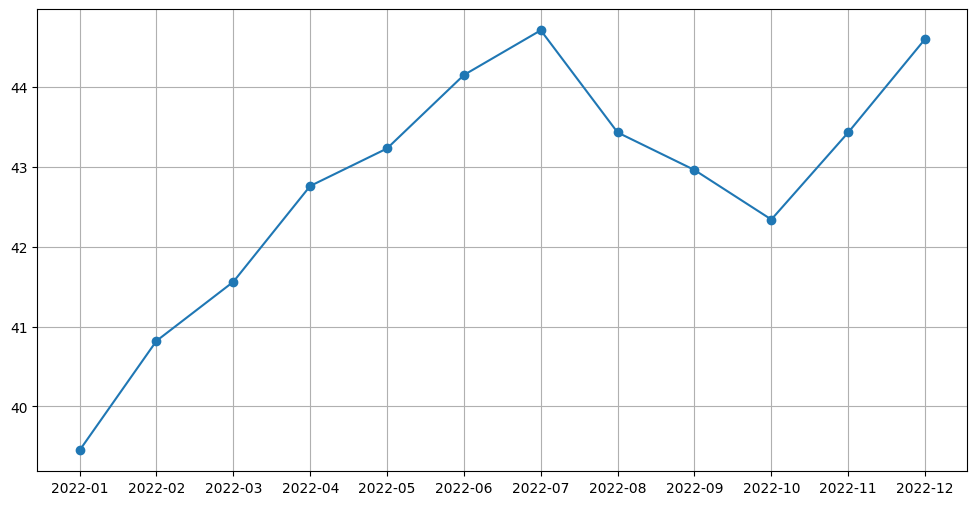

In [9]:
plt.figure(figsize = (12,6))
plt.grid(True)
plt.plot(df_2022['Date'], df_2022['Android'], marker = 'o')
plt.show()

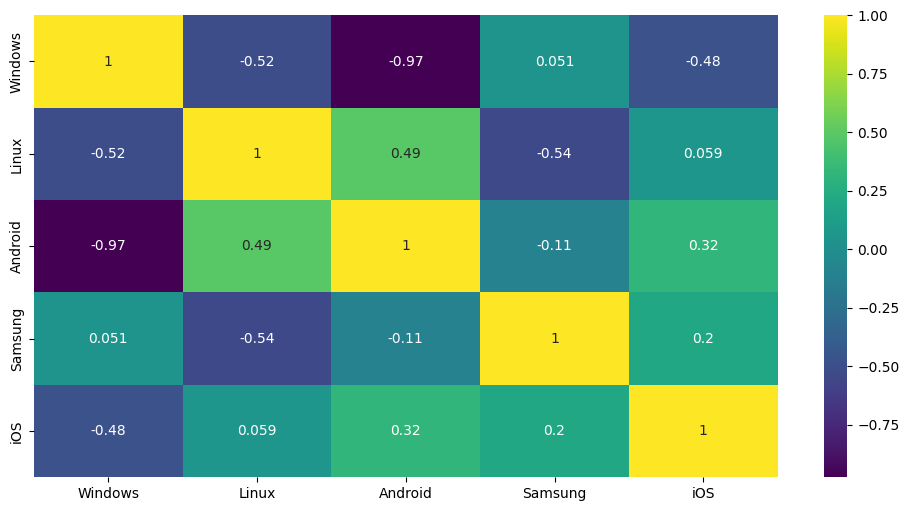

In [10]:
import seaborn as sns

df_2022_corr = ['Windows', 'Linux', 'Android', 'Samsung', 'iOS']
df_2022[df_2022_corr].corr()

plt.figure(figsize = (12,6))
sns.heatmap(df_2022[df_2022_corr].corr(), cmap = 'viridis', annot = True)
plt.show()
